# Fetch_olivetti_faces, PCA, NMF, LDA
# By Vivian Zeng , Sep/30/2020

 Load packages

In [172]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, minmax_scale
from tensorflow.keras.datasets import cifar10
from sklearn.decomposition import PCA, NMF
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, classification_report
from sklearn.datasets import fetch_olivetti_faces
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Download and fetch the data with the following Python code:
1. Each row of X is an image that has been flattened, and y contains an ID for each person. Select an image from this dataset and display it. (5 pts) Hint: this is the same dataset we used in the Week 1 Live Session. 

In [285]:
faces = fetch_olivetti_faces()
X = faces.data
y = faces.target

In [286]:
X.shape

(400, 4096)

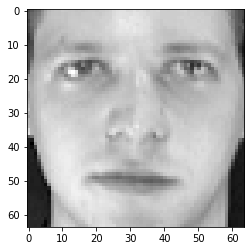

In [287]:
plt.imshow(X[0,:].reshape(64,64), cmap=plt.cm.gray)

2. Setup training and testing sets. Use a 60/40 split for each class (6 training images and 4 test images per person), and set the seed or random_state so that you can repeat the same randomization later. Print the size of the training and testing feature (image) matrices. (5 pts)

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, stratify=y, random_state=1)

In [289]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 4096)
(160, 4096)
(240,)
(160,)


3. Standardize the training data so that each column has mean 0 and standard deviation 1. Apply the transformation to the test data. Print an image. (5 pts)

In [290]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

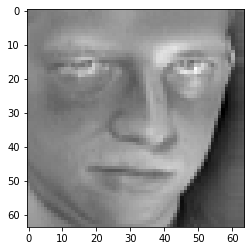

In [291]:
plt.imshow(X_train[0, :].reshape(64,64), cmap=plt.cm.gray)

4. Compute PCA on the training set using 100 components. Plot the first 3 principal component loadings as images. (10 pts)

In [292]:
pca = PCA(n_components=100)

In [293]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [294]:
# Check the variance explained by 100 commponents
print('Top 100 components explain {:.0f}% of the variance.'
 .format(100*pca.explained_variance_ratio_.sum()))

Top 100 components explain 95% of the variance.


In [295]:
# Note: to plot an RGB image with plt.imshow() , we need to give it an array of floats between 0 and 1,  
# or integers between 0 and 255. # Since the PC loadings can be negative, we'll scale the values of 
# each image to fall within range 0 to 1.
loadings = minmax_scale(pca.components_, feature_range=(0,1), axis=1)

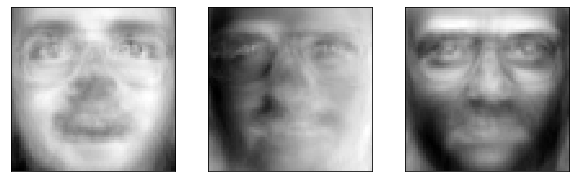

In [296]:
plt.figure(figsize=(10, 10))
for j in range(3):
    plt.subplot(1, 3, j + 1)
    plt.imshow(loadings[j,:].reshape(64,64), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

5. Create a scree plot of the principal components (explained variance vs. number of components). (10 pts)

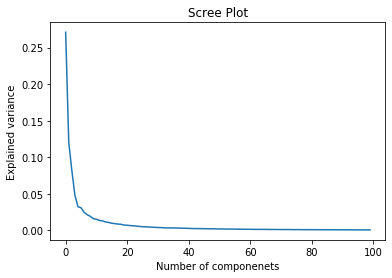

In [297]:
plt.plot(pca.explained_variance_ratio_)
plt.title("Scree Plot")
plt.xlabel('Number of componenets')
plt.ylabel('Explained variance')
plt.show()

6. Use PCA to transform your training and test sets to their principal components. Train an LDA model on these principal components. Make predictions on both the training and test set. Report the accuracy on both the training and test sets. (10 pts)

In [298]:
PC_Xtrain = pca.transform(X_train)
PC_Xtest = pca.transform(X_test)

In [299]:
#Create a lda Classifier
lda = LDA().fit(PC_Xtrain, y_train)

Training set

In [300]:
preds_pca = lda.predict(PC_Xtrain)
probs_pca = lda.predict_proba(PC_Xtrain)

In [301]:
print('Recall: ', recall_score(y_train, preds_pca, average='weighted'))
print('Precision: ', precision_score(y_train, preds_pca, average='weighted'))
print('ROC AUC: ', roc_auc_score(y_train, probs_pca,  multi_class='ovr'))

Recall:  1.0
Precision:  1.0
ROC AUC:  1.0


In [302]:
print('Training accuracy:', accuracy_score(y_train, preds_pca))

Training accuracy: 1.0


Test set

In [303]:
preds_pca = lda.predict(PC_Xtest)
probs_pca = lda.predict_proba(PC_Xtest)

In [304]:
print('Recall: ', recall_score(y_test, preds_pca, average='weighted'))
print('Precision: ', precision_score(y_test, preds_pca, average='weighted'))
print('ROC AUC: ', roc_auc_score(y_test, probs_pca,  multi_class='ovr'))

Recall:  0.95625
Precision:  0.9692857142857143
ROC AUC:  0.9993990384615383


In [305]:
print('Testing accuracy:', accuracy_score(y_test, preds_pca))

Testing accuracy: 0.95625


7. Next, we will use Non-negative Matrix Factorization to reduce the dimensions. First, we need the data to be non-negative. Create your training and testing sets again (using the same seed or random_state from Question 2), but this time don't standardize it (they're already non-negative). (5 pts)

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, stratify=y, random_state=1)

8. Compute the NMF on the training set using 100 components. Plot the first 3 components as images. (10 pts)

In [205]:
nmf = NMF(n_components=100)

In [206]:
nmf.fit(X_train)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=100, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

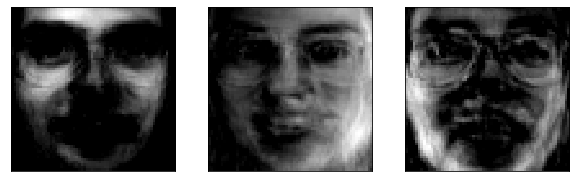

In [207]:
plt.figure(figsize=(10, 10))
for j in range(3):
    plt.subplot(1, 3, j + 1)
    plt.imshow(nmf.components_[j].reshape(64,64), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

9. Use NMF to transform your training and test sets. Train an LDA model on the transformed features. Make predictions on both the training and test set. Report the accuracy on both the training and test sets. (10 pts)

In [208]:
PC_Xtrain = nmf.transform(X_train)
PC_Xtest = nmf.transform(X_test)

In [209]:
#Create a lda Classifier
lda = LDA().fit(PC_Xtrain, y_train)

Training set

In [210]:
preds_nmf = lda.predict(PC_Xtrain)
probs_nmf = lda.predict_proba(PC_Xtrain)

In [211]:
print('Training accuracy:', accuracy_score(y_train, preds_nmf))

Training accuracy: 1.0


Test set

In [212]:
preds_nmf = lda.predict(PC_Xtest)
probs_nmf = lda.predict_proba(PC_Xtest)

In [213]:
print('Testing accuracy:',accuracy_score(y_test, preds_nmf))

Testing accuracy: 0.95625


10. Write a few sentences to compare the features derived from PCA and NMF, and to compare the performance of the models using PCA vs. NMF. (5 pts)

Although the PCA loadings seem some how blur, it represnets the most variance of the images. The NMF loadings are focusing on the details on part of each images. The ordering of the PCA loadings are meaningful (they are ordered by variance explained). The ordering of the NMF loadings are irrelevant.

In this case, the acuracy scores of two models are similar. However, PCA exhibit slightly better performance than NMF with less misclassification images.

11. Pick an example of an image from the test set that was misclassified by the PCA model and print their picture. (5 pts)

In [214]:
df = pd.DataFrame({'preds':preds_pca, 'y':y_test})
df[df.preds != df.y]

,preds,y
17,20,19
91,0,12
94,2,7
99,38,21
122,22,31
131,20,19
158,20,23


In [215]:
missed_index_pca = np.where(preds_pca!= y_test)[0]

In [216]:
missed_index_pca

array([ 17,  91,  94,  99, 122, 131, 158])

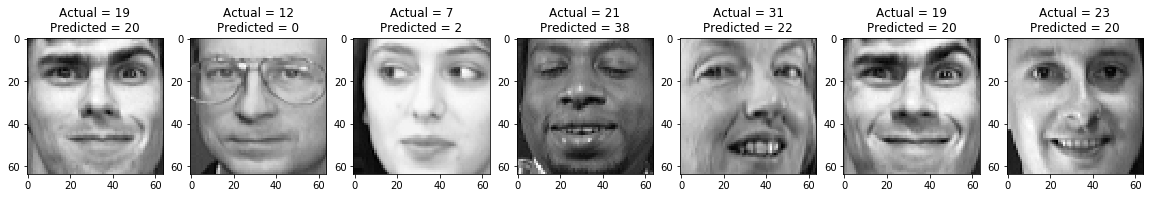

In [217]:
# plot all pictures missclassified by PCA model with actual and predicted IDs.
plt.figure(figsize=(20, 20))
for j in range(len(missed_index_pca)):
    plt.subplot(1, 7, j + 1)
    plt.imshow(X_test[missed_index_pca[j], :].reshape(64,64), cmap=plt.cm.gray) 
    title = ('Actual = ' + str(y_test[missed_index_pca[j]]) + '\nPredicted = ' 
             + str(preds_pca[missed_index_pca[j]])) 
    plt.title(title)

I would like to choose missed_index at 122 as an example, the actual image is 31, which is misclassified as 22.

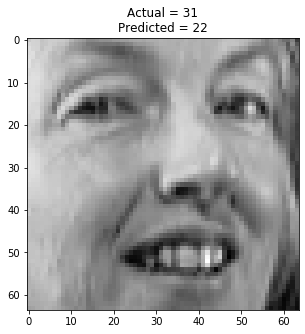

In [219]:
plt.figure(figsize=(5, 5))
j=4
plt.imshow(X_test[missed_index_pca[j], :].reshape(64,64), cmap=plt.cm.gray) 
title = ('Actual = ' + str(y_test[missed_index_pca[j]]) + '\nPredicted = ' 
         + str(preds_pca[missed_index_pca[j]])) 
plt.title(title)
plt.show()

12. For the image you selected in Q11, did the model using NMF misclassify this image as well? (5 pts)

In [220]:
df = pd.DataFrame({'preds':preds_nmf, 'y':y_test})
df[df.preds != df.y]

,preds,y
6,2,13
17,20,19
94,2,7
99,38,21
122,22,31
131,20,19
158,20,23


In [221]:
missed_index_nmf = np.where(preds_nmf != y_test)[0]

In [222]:
missed_index_nmf

array([  6,  17,  94,  99, 122, 131, 158])

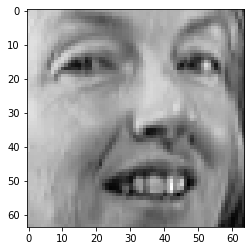

In [223]:
plt.imshow(X_test[122].reshape(64,64), cmap=plt.cm.gray)

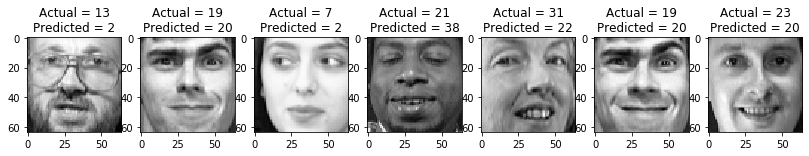

In [224]:
# plot all pictures missclassified by NMF model with actual and predicted IDs.
plt.figure(figsize=(20, 20))
for j in range(len(missed_index_nmf)):
    plt.subplot(1, 10, j + 1)
    plt.imshow(X_test[missed_index_nmf[j], :].reshape(64,64), cmap=plt.cm.gray) 
    title = ('Actual = ' + str(y_test[missed_index_nmf[j]]) + '\nPredicted = ' 
             + str(preds_nmf[missed_index_nmf[j]])) 
    plt.title(title)
    #plt.show()

Yes, the model using NMF also misclassified the image with index of 122. Same as PCA, the actual image is 31, which is misclassified as 22 by NMF.

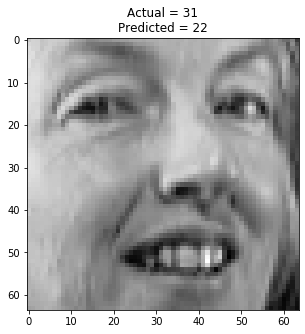

In [226]:
plt.figure(figsize=(5, 5))
j=4
plt.imshow(X_test[missed_index_nmf[j], :].reshape(64,64), cmap=plt.cm.gray) 
title = ('Actual = ' + str(y_test[missed_index_nmf[j]]) + '\nPredicted = ' 
         + str(preds_nmf[missed_index_nmf[j]])) 
plt.title(title)
plt.show()

13. Who did the model think it was? (5 pts)

What class (person) did the model using PCA predict for Question 11?
Pick an image of that person and print it. 

ANSWER:The model thought it was the person on number 22nd image.

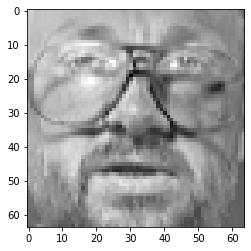

In [318]:
#The model thought it was:
plt.imshow(X_test[22].reshape(64,64), cmap=plt.cm.gray)

14. Did the model make a sensible prediction? (5 pts)

Do you think the person in Q13 looks similar to the correct one from Q11?
What probabilities did the model using PCA assign to the actual and predicted classes? 

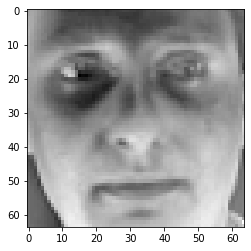

In [319]:
# The correct one from Q11 is:
plt.imshow(X_test[31].reshape(64,64), cmap=plt.cm.gray)

ANSWER: The person in Q13 looks no similar to the correct one from Q11. For this image, the model is not sensitive enough for prediction.

In [320]:
print('Predicted probabilites:', probs_pca[122][22])

Predicted probabilites: 0.9999999923173383


In [321]:
print('Actual probabilites:', probs_pca[122][31])

Actual probabilites: 4.142561551375613e-76


15. From an ethical perspective what concerns do you have about these PCA features being used in a new facial recognition software? Explain in a few sentences. (5 pts)

These PCA features may misclassify some faces leading to wrong results and ethical issues once applied in new facial recognition software. Data stolen, privacy leakage, hacking, fraud and other complications may happen due to such misclassification. 